# Predictive Analysis
To implement Predictive Analytics for forecasting future emissions and suggesting reduction strategies, we need to take the following steps:
1. **Data Preprocessing and Feature Engineering:**
*	Before building predictive models, ensure that the dataset is cleaned and preprocessed.
*	You may need to create additional features (e.g., **day of the week, month, seasonality, historical emission trends, etc.**) that may influence future emissions.
2. **Model Selection:**
*	For time series forecasting, common models include:
  *	**ARIMA (AutoRegressive Integrated Moving Average):** Useful for univariate time series data where trends and seasonality can be captured.
  *	**Prophet:** Developed by Facebook, useful for handling seasonality and holidays with more flexibility than ARIMA.
  *	**LSTM (Long Short-Term Memory):** A type of neural network suitable for sequential data (time series) if you need deep learning approaches.
*	**For emission reduction strategies:**
  *	After predicting future emissions, use optimization techniques or linear regression to estimate the impact of different strategies on emissions (e.g., reducing energy consumption, improving logistics, changing manufacturing processes).
3. **Time Series Forecasting:**
*	Build a time series model (e.g., ARIMA or Prophet) to predict future emissions based on historical data.
*	Evaluation: Evaluate the model using metrics like **Mean Absolute Error (MAE)**, **Mean Squared Error (MSE)**, or **R² score**.
4. **Emissions Reduction Strategies:**
*	Identify key sources of emissions from the data.
*	Create a set of potential reduction strategies (e.g., improving energy efficiency, switching to renewable energy, optimizing logistics, etc.).
*	Model how these strategies could impact emissions by simulating different scenarios.


In [3]:
# Step 1: Install necessary packages
!pip install prophet matplotlib

In [4]:
# Step 2: Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [6]:
# Step 4: Load the emissions dataset
final_df = pd.read_csv('/content/dataset_csv/combined_co2_emissions.csv')

In [7]:
# Step 5: Prepare the Data for Time Series Forecasting
# Ensure 'Date' is in datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'])

In [8]:
# Aggregate emissions data by Date (sum of all sources)
time_series_data = final_df.groupby('Date')['Total_CO2_Emissions (kg)'].sum().reset_index()

In [9]:
# Set 'Date' as index for time series modeling
time_series_data.set_index('Date', inplace=True)

In [10]:
# Check the data
print(time_series_data.head())

            Total_CO2_Emissions (kg)
Date                                
2025-03-01                   2125.00
2025-03-02                   2823.00
2025-03-03                   2366.75
2025-03-04                   2808.50
2025-03-05                   2360.00


In [11]:
# Step 6: Time Series Forecasting using Prophet
# Prepare the data for Prophet (it expects a DataFrame with 'ds' and 'y' columns)
df_prophet = time_series_data.reset_index()
df_prophet.columns = ['ds', 'y']

In [12]:
# Create and fit the Prophet model
model = Prophet()
model.fit(df_prophet)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8j8e1pw6/x0p9yo3d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp8j8e1pw6/3encsu18.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89411', 'data', 'file=/tmp/tmp8j8e1pw6/x0p9yo3d.json', 'init=/tmp/tmp8j8e1pw6/3encsu18.json', 'output', 'file=/tmp/tmp8j8e1pw6/prophet_modelrcwzho29/prophet_model-20250215014020.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
01:40:20 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
01:40:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:

/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(


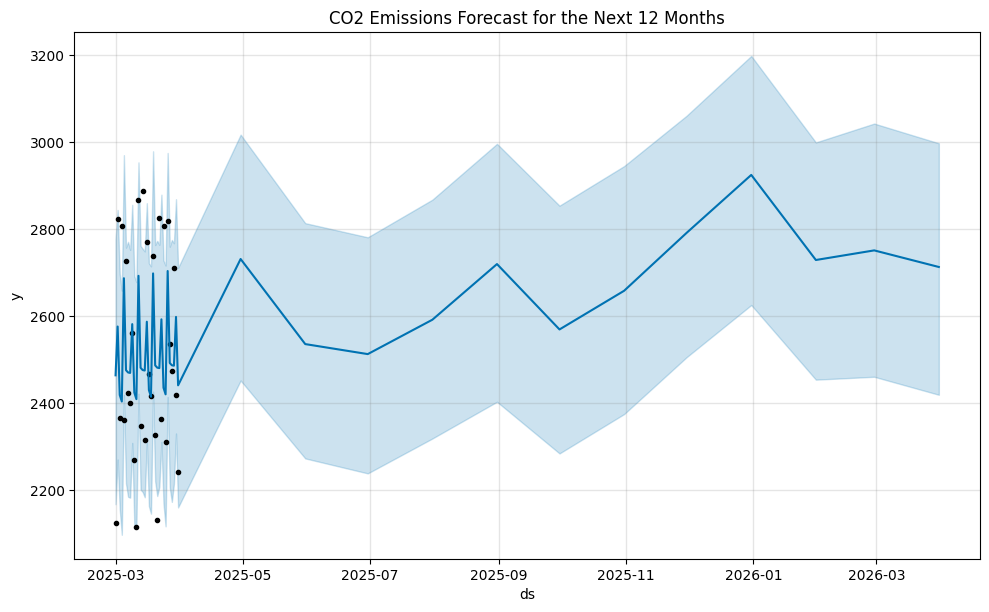

In [17]:
# Make a dataframe for future predictions (predict for the next 12 months)
future = model.make_future_dataframe(periods=12, freq='M')  # No need for df_prophet argument

# Predict future emissions
forecast = model.predict(future)

# Plot the forecast
model.plot(forecast)
plt.title("CO2 Emissions Forecast for the Next 12 Months")
plt.show()

**Step 7: Model Evaluation (Optional, assuming actual emissions test set available):**

 You can compare predicted values to actual values if available

Example code to calculate Mean Absolute Error (MAE)



In [ ]:
# Assuming you have a separate test set of actual emissions to compare
# actual_values = test_set['y']  # Replace with actual test set data
# predicted_values = forecast['yhat'][-len(test_set):]  # Use the last predictions that correspond to the test set

# Calculate MAE (uncomment if you have a test set)
# mae = mean_absolute_error(actual_values, predicted_values)
# print(f"Mean Absolute Error (MAE): {mae}")

**Step 8: Emissions Reduction Strategies**

Once we have the forecasted emissions, we can implement **a simple strategy to suggest reduction options**. This would be based on historical data of emission sources, and we can simulate a few strategies. For simplicity, let’s assume:
1.	**Energy Efficiency**: Reduce emissions from electricity usage (Scope 2).
2.	**Logistics Optimization**: Reduce emissions from transportation (Scope 3).
3.	**Renewable Energy**: Transition to renewable energy sources to reduce emissions.


In [20]:
# Step 8: Emissions Reduction Strategies (Simulating reductions)
def simulate_strategies(df):
    # Simulate reducing Scope 2 emissions by 10% (e.g., energy efficiency)
    df['Scope_2_Reduction_10%'] = df['CO2 Emissions (kg CO2)_electricity'] * 0.9

    # Simulate reducing Scope 3 emissions by 15% (e.g., logistics optimization)
    df['Scope_3_Reduction_15%'] = df['CO2 Emissions (kg)_logistics'] * 0.85

    # Simulate transitioning to 50% renewable energy for Scope 2
    df['Scope_2_Renewable_50%'] = df['CO2 Emissions (kg CO2)_electricity'] * 0.5

    return df

In [21]:
# Apply strategies to the data
final_df = simulate_strategies(final_df)

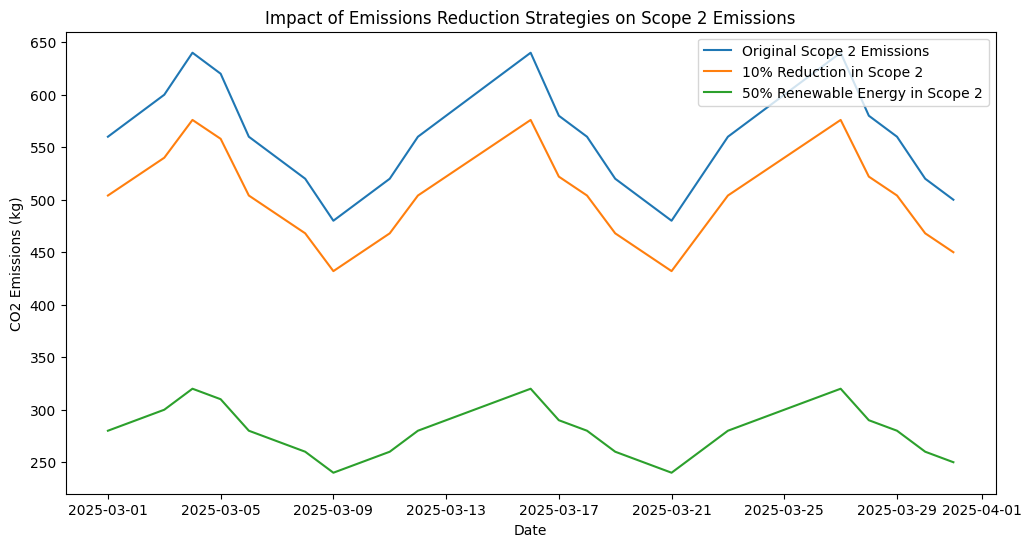

In [24]:
# Visualize the impact of these strategies on emissions over time
plt.figure(figsize=(12, 6))
plt.plot(final_df['Date'], final_df['CO2 Emissions (kg CO2)_electricity'], label='Original Scope 2 Emissions')
plt.plot(final_df['Date'], final_df['Scope_2_Reduction_10%'], label='10% Reduction in Scope 2')
plt.plot(final_df['Date'], final_df['Scope_2_Renewable_50%'], label='50% Renewable Energy in Scope 2')

plt.xlabel('Date')
plt.ylabel('CO2 Emissions (kg)')
plt.title('Impact of Emissions Reduction Strategies on Scope 2 Emissions')
plt.legend()
plt.show()

In [26]:
# Step 9: Save the updated dataset with the strategies applied
final_df.to_csv('/content/report/combined_co2_emissions_with_reduction_strategies.csv')

**Future Improvements:**
*	Fine-tune the model with more sophisticated algorithms (e.g., LSTM for deep learning).
*	Implement real-time predictions using data from IoT sensors for near-instant feedback.
*	Build a more robust set of reduction strategies and integrate them into the business operations for actionable insights.
